# Perceptron neural network for multiclass classification
We will now use a simple Perceptron NN for multiple classification. 
Our neural network will follow the next architecture (with 4 inputs and 3 outputs):

<img src="img/iris_multiple_classifier.png" width="600px"/>

Particularly, we will classify whether the type of iris: setosa, versicolor and virginica.

## Imports
We import the required modules:

In [1]:
from keras.src.layers import Dense
from keras.src.optimizers import SGD
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
from utils import show_history

## Data preparation
We load the iris dataset. Then we create the X (independent variables) and y (dependent variable) dataframes.
Finally, `iris_df` holds both X and y in the same dataframe.

In [2]:
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
X_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(data=iris.target, columns=['species'])

We transform the species feature to one-hot encoding: 
instead of three a feature with 3 possible values, we have 3 different binary features: species_0, species_1 and species_2.
We concatenate `X_df` and `y_df` and we show the whole dataset (notice the one-hot encoding for species).

In [3]:
y_one_hot = pd.get_dummies(y_df['species'], prefix='species').map(lambda boolean: 1 if boolean else 0)
iris_df = pd.concat([X_df, y_one_hot], axis=1)
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)   species_0   species_1   species_2  
count        150.000000  150.000000  150.000000  150.000000  
mean           1.199333    0.333333    0.333333    0.333333  
std            0.762238    0.472984    0.472984    0.472984  
min            0.100000    0.000000    0.000000    0.000000  
25%            0.300000    0.000000    0.000000    0.000000  
50%            1.300000    0.000000    0.0

We prepare our X and y dataframes. In this case, y has three variables (one for each type of flower).

In [4]:
y_column_names = ['species_0', 'species_1', 'species_2']
# X is the dataset without the target variable (species)
X = iris_df.drop(labels=y_column_names, axis=1)
# y is species_0, species_1 and species_3 (three different classes / outputs)
y = iris_df[['species_0', 'species_1', 'species_2']]

Then, we split the dataset in 80% train and 20% test.

In [5]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Neural network
A simple neuron is created with 4 inputs and 3 outputs. 
A sigmoid activation function is required because we have three binary classifiers.
The network has one single neuron with 15 parameters: 3 output neurons * (4 weights for inputs + bias).
All the parameters all trainable (learned) from data.

In [6]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='sigmoid'))
model.summary()  # params=15: 3 output neurons * (4 weights for inputs + bias)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will use binary cross entropy as the loss function, since we are building three binary classifiers. 
For optimization, we use Stochastic Gradient Descent (SGD).
We want to be prompted loss (binary cross entropy) and accuracy. 

In [7]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

We now train the model (learn the parameters) for 300 epochs. 

In [8]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300


4/4 [==============================] - 1s 9ms/step - loss: 2.2289 - accuracy: 0.2667
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 1.9405 - accuracy: 0.2833
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 1.6750 - accuracy: 0.2917
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 1.4347 - accuracy: 0.3000
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 1.2288 - accuracy: 0.3167
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0611 - accuracy: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9330 - accuracy: 0.3167
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8417 - accuracy: 0.3250
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7770 - accuracy: 0.2750
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.1917
Epoch 11/300
4/4 [=========

Let's plot the training loss and accuracy for the training dataset:

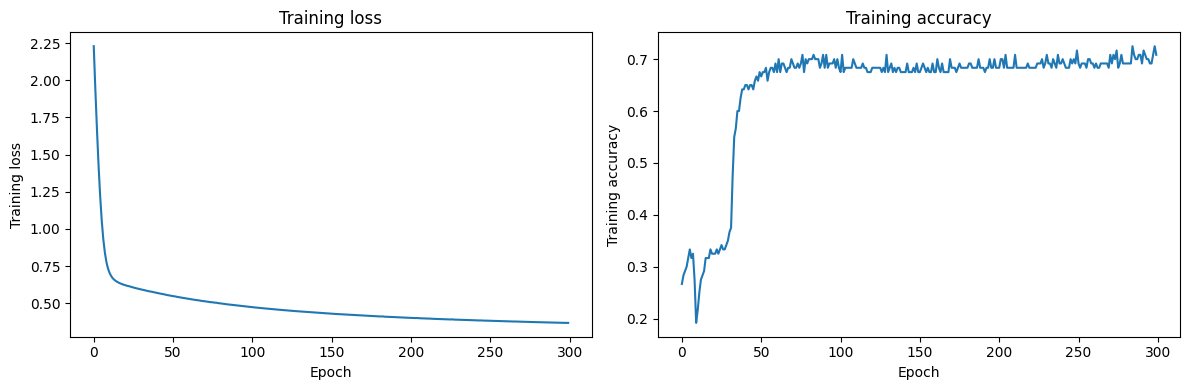

In [9]:
show_history(history, loss_label='Training loss', accuracy_label='Training accuracy')

## Prediction
We apply the neural network to the test dataset (forward propagation).
That returns three probabilities, one for each class of iris.
Next, we have to assign the class with the highest probability because it can not occur that one flower has more than one type (or no type at all). That is, we are dealing with a *multiclass* classification problem (not a multilabel one: a multilabel classifier allows an instance to belong to different classes at the same time).  
We sho the predictions for the test set.

In [10]:
prediction_probabilities = model.predict(X_test, verbose=0)
# function that, given a row, replaces 1 for its highest value and 0 for the rest (selects the highest value)
max_value_per_row = lambda row: [1 if i == max(row) else 0 for i in row]
# selects as the predicted class the one with the highest probability
prediction = np.apply_along_axis(max_value_per_row, 1, prediction_probabilities)
print(prediction)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


### Assessment
We show accuracy test set.

In [11]:
print('Accuracy:', accuracy_score(y_test, prediction))

Accuracy: 0.6666666666666666


## F1-score
If we want to compute F1-score for multiclass classifiers, there are two ways of doing it:
1. *Micro F1*: Calculates precision, recall, and F1-score globally by counting the total true positives, false positives, and false negatives across all classes. This is suitable when there is a significant class imbalance, as it treats all instances equally.
2. *Macro F1*: Calculates precision, recall, and F1-score for each class individually. Average these scores across all classes.

In [12]:
print('F1-score micro:', f1_score(y_test, prediction, average='micro'))
print('F1-score macro:', f1_score(y_test, prediction, average='macro'))

F1-score micro: 0.6666666666666666
F1-score macro: 0.6336996336996337


# Questions
1. Why do you think micro F1-score has the same value as accuracy?
2. Why do you think macro F1 is lower than micro F1? 

# Answers

1. Because the accuracy is measured the same as micro (considering all the samples equally) and the dataset is perfectly balanced. That makes accuracy and micro F1 to be equal.
2. It is because the second class (versicolor) is barely predicted (and it should because they are equally distributed). That low performance in one class makes the macro F1 to be lower than micro.